In [4]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml("mnist_784", as_frame=False)
Images, Labels= mnist.data, mnist.target
Images

c:\Users\Simon\Anaconda3\envs\MachineLearning\Lib\site-packages\sklearn\datasets\_openml.py:932: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

'5'

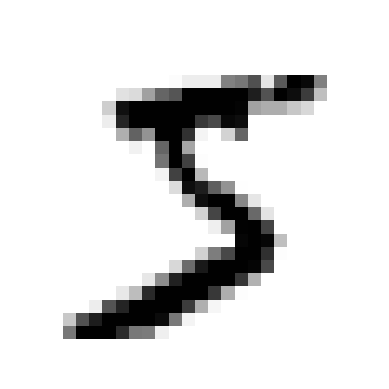

In [7]:
import matplotlib.pyplot as plt

def plot_digit(digit):
    image=digit.reshape(28,28) # Each mnist image is a 28x28 bitmap
    plt.imshow(image, cmap="binary")
    plt.axis("off")
    
SomeDigit = Images[0]
plot_digit(SomeDigit)
Labels[0]

The Mnist dataset is already split into a training and validation dataset. (with stratified sampling) The first 60 000 images are the training set and the last 10 000 are the validation set

In [16]:
TrainingImages, TrainingLabels, ValidationImages, ValidationLabels = Images[:60000], Labels[:60000], Images[60000:], Labels[60000:]

**BINARY CLASSIFIER**

We will firrst train a binary classifier to recognise fives from non-fives

In [20]:
TrainingLabelsIsFive = (TrainingLabels == '5')
ValidationLabelsIsFive = (ValidationLabels == '5')

In [23]:
# Stochastic gradient descent classifier (linear model)
from sklearn.linear_model import SGDClassifier
SGDClf = SGDClassifier(random_state=42)
SGDClf.fit(TrainingImages, TrainingLabelsIsFive)
SGDClf.predict([SomeDigit])

array([ True])

Perform 3-fold cross validation

In [25]:
from sklearn.model_selection import cross_val_score

cross_val_score(SGDClf, TrainingImages, TrainingLabelsIsFive, cv=3, scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

note that 95% accuracy is not that good as there is only 10% of fives in the set, which implies that allways rejecting the number yields 90% precision...
accuracy is very bad when used with skewed datasets

In [26]:
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import cross_val_score

DummyClf = DummyClassifier()
cross_val_score(DummyClf, TrainingImages, TrainingLabelsIsFive, cv=3, scoring="accuracy")

array([0.90965, 0.90965, 0.90965])

Draw a confusion matrix

In [27]:
from sklearn.model_selection import cross_val_predict

LabelIsFivePredict = cross_val_predict(SGDClf, TrainingImages, TrainingLabelsIsFive, cv=3)

In [29]:
from sklearn.metrics import confusion_matrix

CM = confusion_matrix(TrainingLabelsIsFive, LabelIsFivePredict)
CM

array([[53892,   687],
       [ 1891,  3530]], dtype=int64)

Compute precision & recall

In [32]:
from sklearn.metrics import precision_score
precision_score(TrainingLabelsIsFive, LabelIsFivePredict)

0.8370879772350012

In [33]:
from sklearn.metrics import recall_score
recall_score(TrainingLabelsIsFive, LabelIsFivePredict)

0.6511713705958311

compute the $F_1$ score

In [34]:
from sklearn.metrics import f1_score
f1_score(TrainingLabelsIsFive, LabelIsFivePredict)

0.7325171197343846